# Importing Libraries and Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm #stats model public access version
import os
import quandl
import warnings

warnings.filterwarnings("ignore") # Disable deprecation warnings 

plt.style.use('fivethirtyeight')# This is a styling option for how your plots will appear. More examples here:
                                # https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
                                # https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
#import data
path = r'C:\Users\liz20\OneDrive\Career Foundry\6. Advanced Analytics & Dashboard Design'
df = pd.read_csv(os.path.join(path,'Prepared Data', 'CleanedData.csv'))
dfT = pd.read_csv(os.path.join(path,'Prepared Data','TransposedDays.csv'))

In [3]:
dfT.head()

,Day,Cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5


In [4]:
df2= dfT.set_index('Day')

In [5]:
df2.shape

(326, 1)

In [6]:
type(df2)

pandas.core.frame.DataFrame

In [7]:
df2.dtypes

Cases    int64
dtype: object

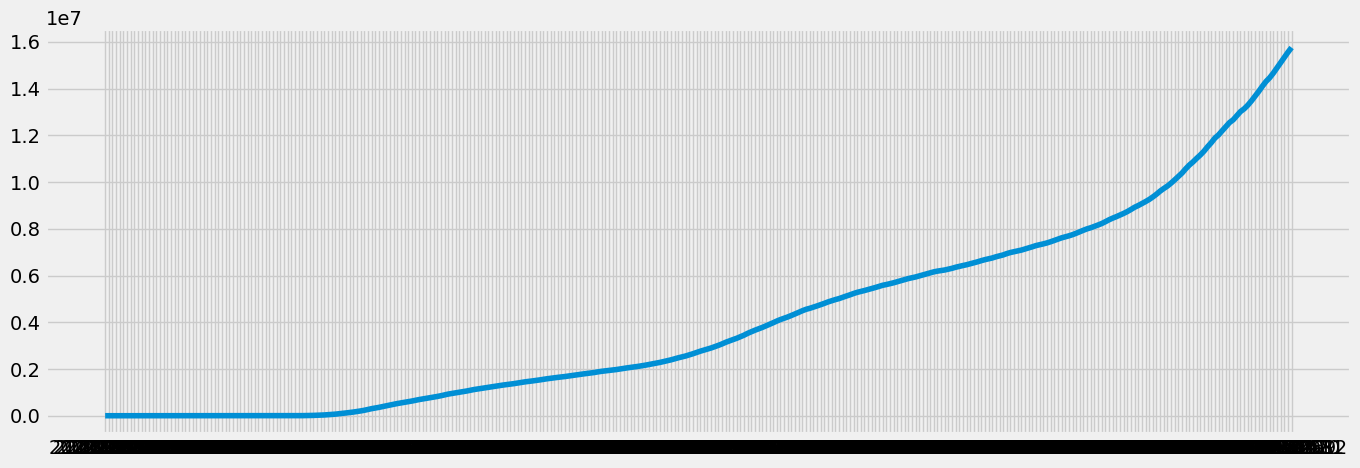

In [8]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df2)

# Data Cleaning

In [9]:
data = df2.reset_index()

In [10]:
data

,Day,Cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
321,2020-12-08,14879639
322,2020-12-09,15104009
323,2020-12-10,15315518
324,2020-12-11,15550127


In [11]:
#set date as inde in correct datetime format
from datetime import datetime

data['datetime'] = pd.to_datetime(data['Day'])
data = data.set_index('datetime')
data.drop(['Day'], axis=1, inplace=True) 
data.head()

,Cases
datetime,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5


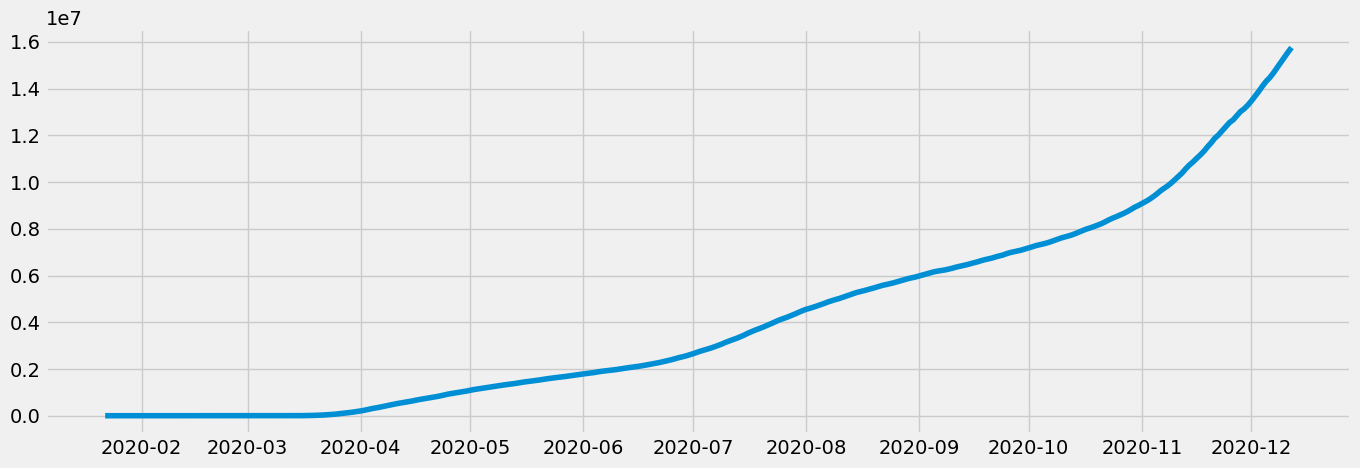

In [12]:
# Re-Plot the data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [13]:
#check for null values
data.isnull().sum() 

Cases    0
dtype: int64

In [14]:
# Check for duplicates
dups = data.duplicated()
dups.sum()
#Duplicate numbers here do not indicate a mistake, multiple days can have the sam number of cases

22

# Time Series Analysis: Decompostion

In [15]:
#additive model to decompose time series
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

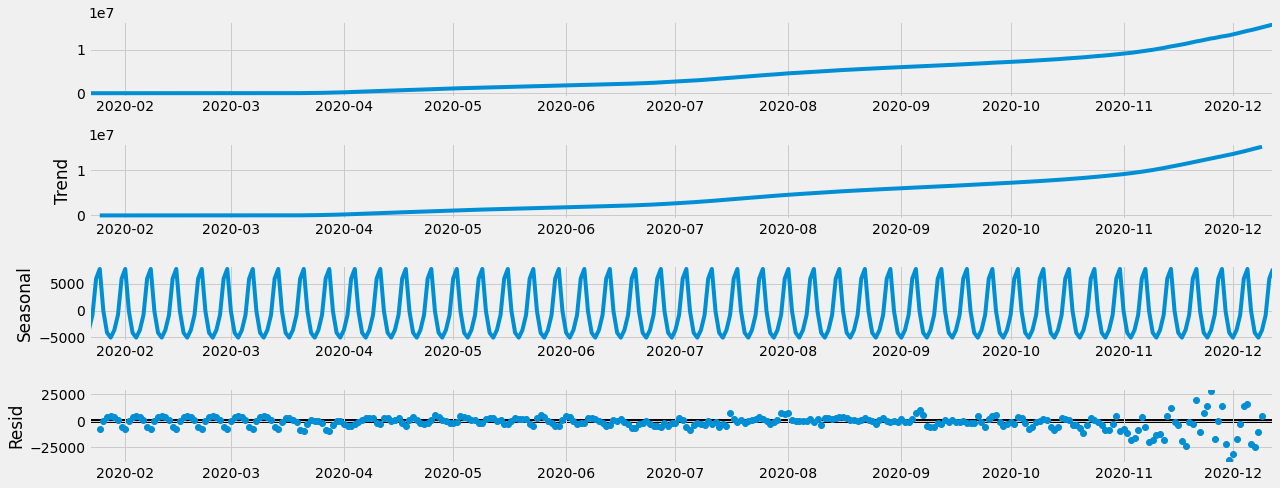

In [17]:
# Plot the separate components

decomposition.plot()
plt.show()

# Time Series Analysis: Stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Cases'])

Dickey-Fuller Stationarity test:
Test Statistic                   2.136623
p-value                          0.998826
Number of Lags Used             16.000000
Number of Observations Used    309.000000
Critical Value (1%)             -3.451691
Critical Value (5%)             -2.870939
Critical Value (10%)            -2.571778
dtype: float64


Our Test statistic is 2.1 and is greater than all critical values so we are not able to reject the null hypothesis.

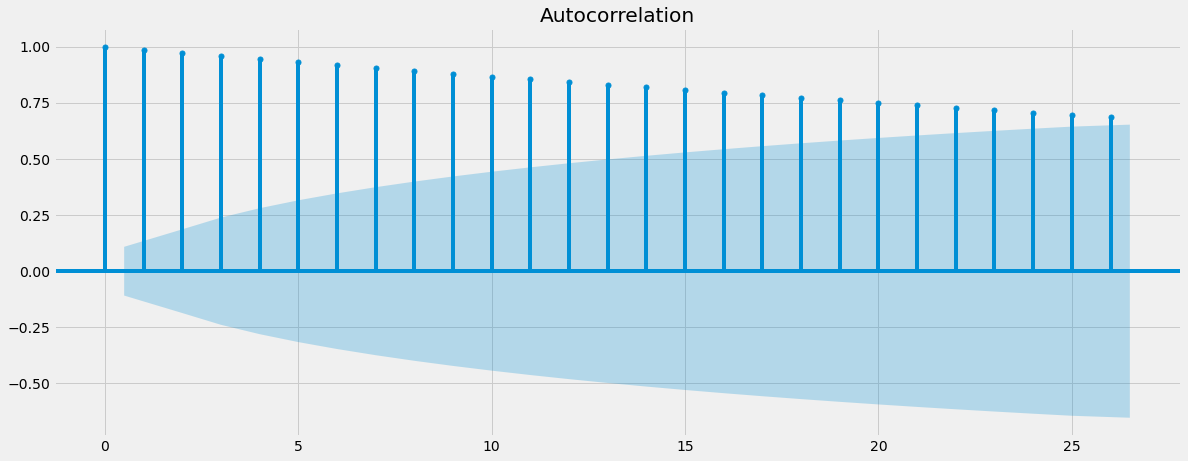

In [19]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

# Stationarizing Data

In [20]:
data_diff = data - data.shift(1)

In [21]:
# Here, you remove the missing values that came about as a result of the differencing. 
data_diff.dropna(inplace = True) 

In [22]:
data_diff.head()

,Cases
datetime,
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,3.0
2020-01-27,1.0


In [23]:
data_diff.columns

Index(['Cases'], dtype='object')

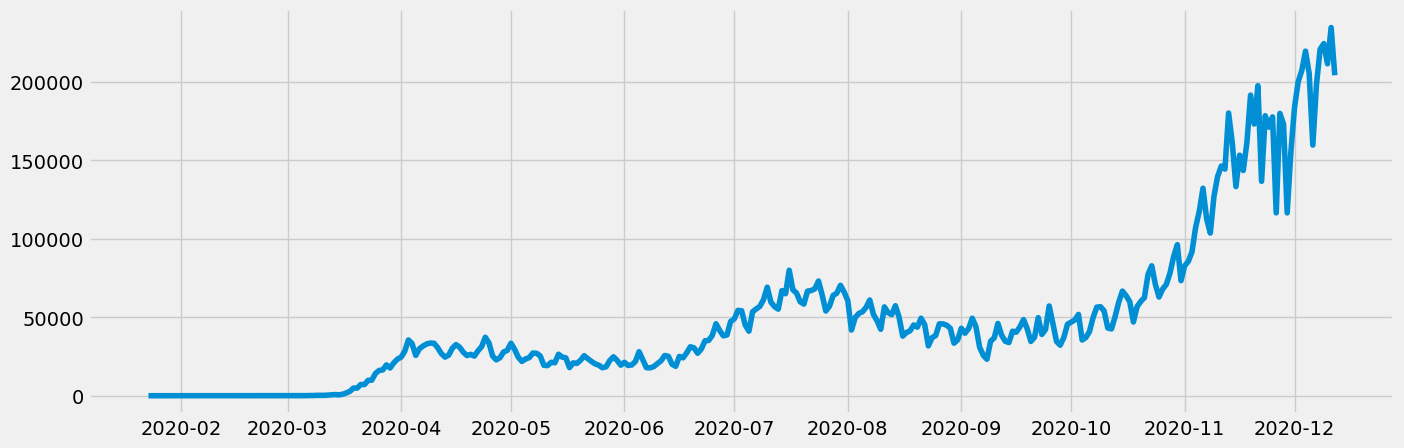

In [24]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [25]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   1.193945
p-value                          0.995944
Number of Lags Used             17.000000
Number of Observations Used    307.000000
Critical Value (1%)             -3.451831
Critical Value (5%)             -2.871001
Critical Value (10%)            -2.571811
dtype: float64


Our Test statistic is 1.2 and is greater than all critical values so we are not able to reject the null hypothesis.

# Time Series Analysis: Log Transformation

In [26]:
log= data['Cases']

In [27]:
LogT=np.log(log)

In [28]:
data['Log']= LogT

In [29]:
data.head()

,Cases,Log
datetime,,
2020-01-22,1,0.000000
2020-01-23,1,0.000000
2020-01-24,2,0.693147
2020-01-25,2,0.693147
2020-01-26,5,1.609438


In [30]:
Log= data.drop(columns=['Cases'])

In [31]:
Log.head()

,Log
datetime,
2020-01-22,0.000000
2020-01-23,0.000000
2020-01-24,0.693147
2020-01-25,0.693147
2020-01-26,1.609438


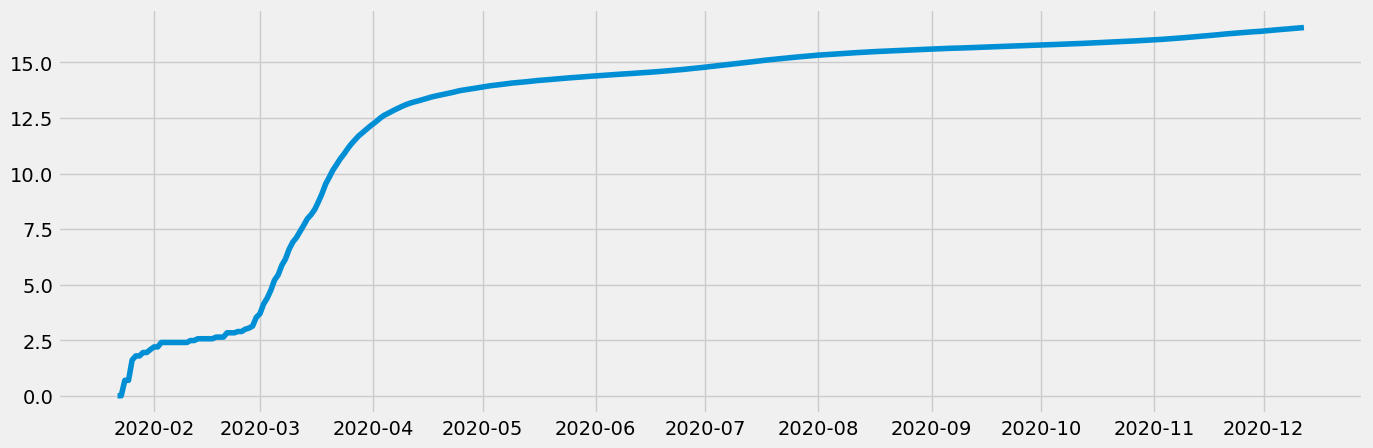

In [32]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(Log)

In [33]:
dickey_fuller(Log)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.057710
p-value                          0.029845
Number of Lags Used             10.000000
Number of Observations Used    315.000000
Critical Value (1%)             -3.451281
Critical Value (5%)             -2.870760
Critical Value (10%)            -2.571682
dtype: float64


Since the test statistic was lower than the critical value at a 5% confidence level, we can reject the null hypothesis and render the data set stationary. There is still a high rate of autocorrelation as seen above. We will need to keep stationizing the data.

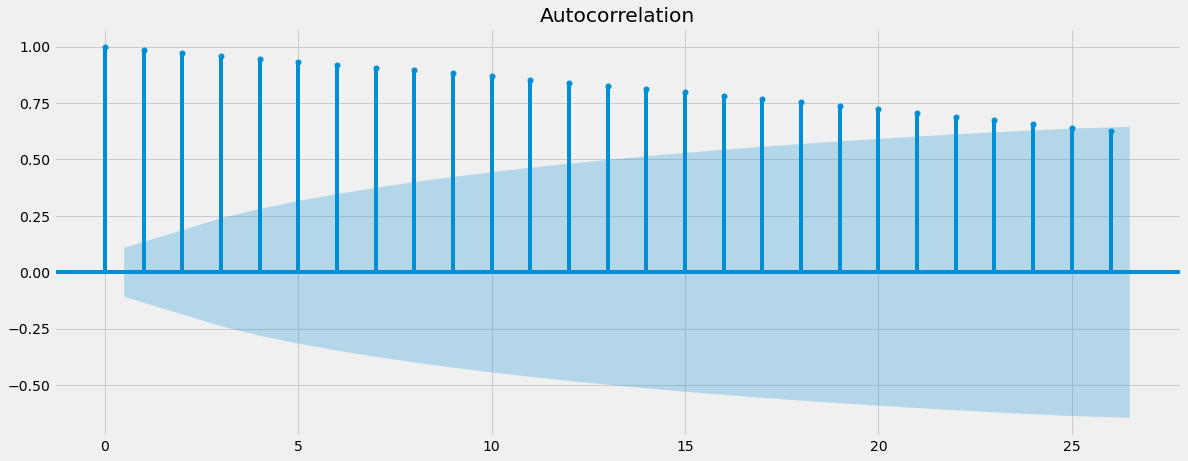

In [34]:
plot_acf(Log)
plt.show()

In [35]:
Log2= Log['Log']

In [36]:
LogT2=np.log(Log2)

In [37]:
Log['Cases_Log']= LogT2

In [38]:
df_Log= Log.drop(columns=['Log'])

In [39]:
df_Log

,Cases_Log
datetime,
2020-01-22,-inf
2020-01-23,-inf
2020-01-24,-0.366513
2020-01-25,-0.366513
2020-01-26,0.475885
...,...
2020-12-08,2.804300
2020-12-09,2.805205
2020-12-10,2.806046


In [52]:
df_Log.to_csv(os.path.join(path, 'Prepared Data', 'RemoveInf.csv'))

In [53]:
df_LogR= df_Log[df_Log['Cases_Log']>=(-0.4)]

In [54]:
df_LogR

,Cases_Log
datetime,
2020-01-24,-0.366513
2020-01-25,-0.366513
2020-01-26,0.475885
2020-01-27,0.583198
2020-01-28,0.583198
...,...
2020-12-08,2.804300
2020-12-09,2.805205
2020-12-10,2.806046


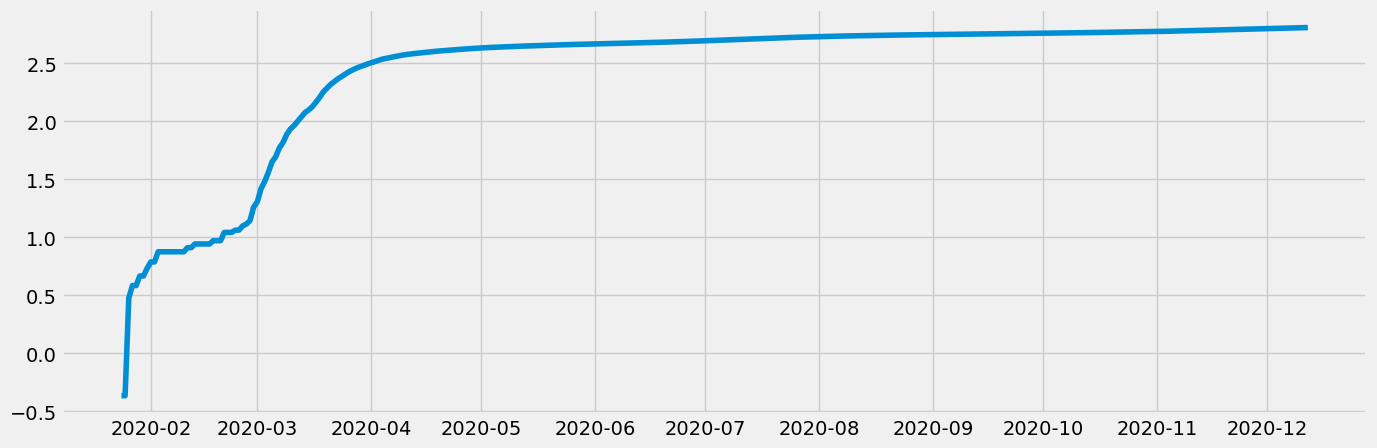

In [55]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_LogR)

In [56]:
dickey_fuller(df_LogR)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.743160
p-value                          0.000070
Number of Lags Used             17.000000
Number of Observations Used    306.000000
Critical Value (1%)             -3.451902
Critical Value (5%)             -2.871032
Critical Value (10%)            -2.571827
dtype: float64


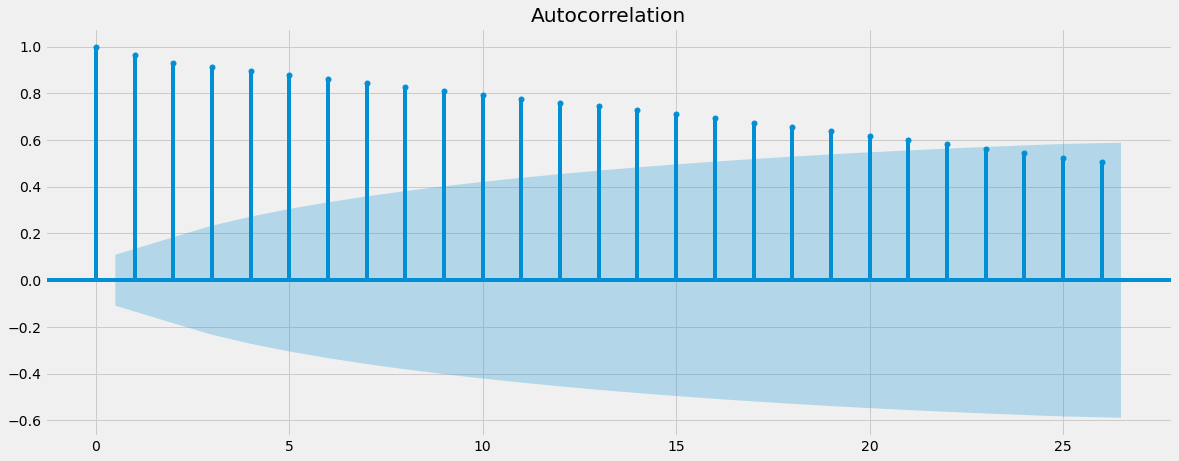

In [57]:
plot_acf(df_LogR)
plt.show()

In [61]:
L= df_LogR['Cases_Log']
Log_Row2=np.log(L)

In [63]:
df_LogR['Cases_Log3']=Log_Row2

In [69]:
df_LogR.dropna(inplace = True)

In [73]:
df3= df_LogR.drop(columns=['Cases_Log'])

In [74]:
df3

,Cases_Log3
datetime,
2020-01-26,-0.742579
2020-01-27,-0.539228
2020-01-28,-0.539228
2020-01-29,-0.406871
2020-01-30,-0.406871
...,...
2020-12-08,1.031154
2020-12-09,1.031477
2020-12-10,1.031776


In [75]:
dickey_fuller(df3)

Dickey-Fuller Stationarity test:
Test Statistic                  -5.327234
p-value                          0.000005
Number of Lags Used             17.000000
Number of Observations Used    304.000000
Critical Value (1%)             -3.452045
Critical Value (5%)             -2.871095
Critical Value (10%)            -2.571861
dtype: float64


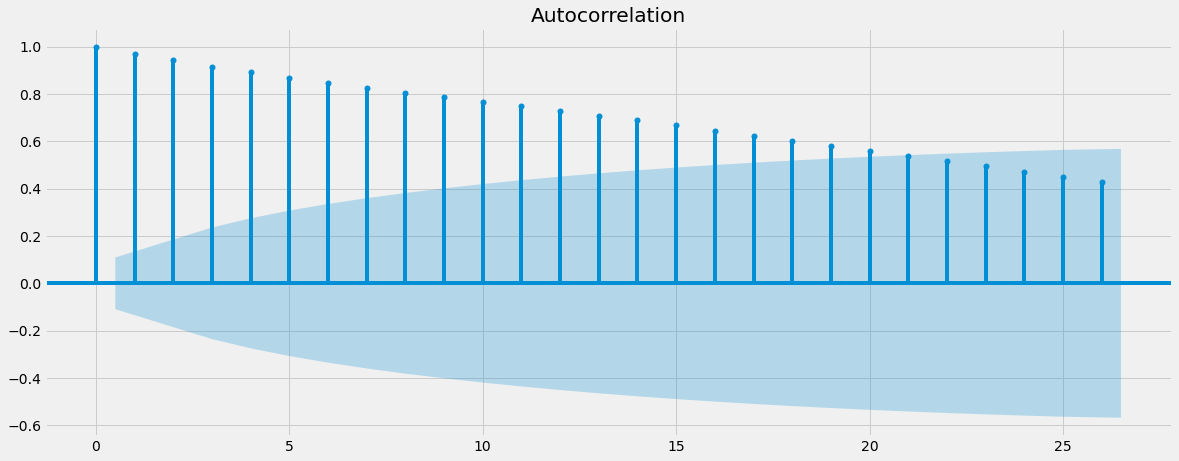

In [76]:
plot_acf(df3)
plt.show()

While the data passes the Dickey-Fuller test for stationality, it still has high autocorrelation which decreases very slowly. This means the stationality is weak.